In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [100]:
df = pd.read_pickle('../Dataframes/df_compiled_adjusted_daily_temp_gbg_save.pkl')

In [101]:
df

,Datum,Kvalitet,Snittemperatur,Year,Month,day_of_year,Over_10_5_days_in_a_row,0_or_under_5_days_in_a_row
0,1944-01-01,G,3.20,1944,1,1,0,0
1,1944-01-02,G,3.60,1944,1,2,0,0
2,1944-01-03,G,2.80,1944,1,3,0,0
3,1944-01-04,G,-4.47,1944,1,4,0,0
4,1944-01-05,G,-1.40,1944,1,5,0,0
...,...,...,...,...,...,...,...,...
29002,2023-06-27,G,17.02,2023,6,178,0,0
29003,2023-06-28,G,18.56,2023,6,179,0,0
29004,2023-06-29,G,18.06,2023,6,180,0,0
29005,2023-06-30,G,16.24,2023,6,181,0,0


In [102]:
# Set comparisons
year_bef_start = pd.to_datetime('2009-03-20')
year_bef_end = pd.to_datetime('2009-06-01')
year_after_start = pd.to_datetime('2011-03-20')
year_after_end = pd.to_datetime('2011-06-01')

In [103]:
start = pd.to_datetime('2010-03-20')
end = pd.to_datetime('2010-06-01')
second_phase = pd.to_datetime('2010-04-14')
air_trafic_resumes = pd.to_datetime('2010-04-20')

In [104]:
df_volcano = df[(df['Datum'] >= start) & (df['Datum'] <= end)]


In [105]:
df_year_bef = df[(df['Datum'] >= year_bef_start) & (df['Datum'] <= year_bef_end)]
# df_year_bef['Day_of_year'] = df_year_bef['Datum'].dt.day_of_year
df_year_after = df[(df['Datum'] >= year_after_start) & (df['Datum'] <= year_after_end)]
# df_year_after['Day_of_year'] = df_year_after['Datum'].dt.day_of_year


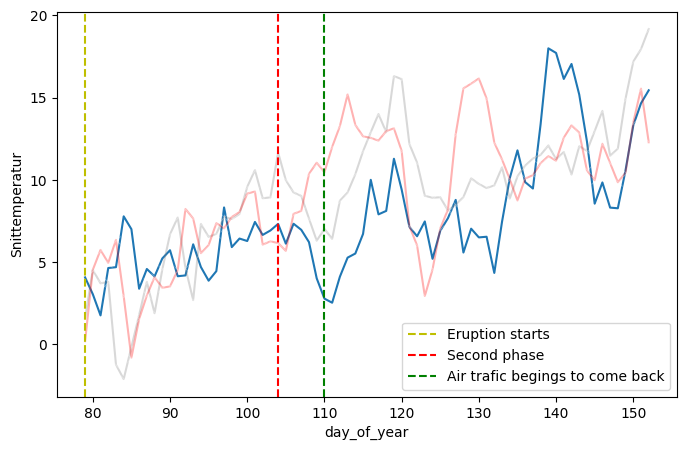

In [107]:
plt.figure(figsize=(8, 5))

graph = sns.lineplot(x=df_volcano['day_of_year'], y=df_volcano['Snittemperatur'])
sns.lineplot(x=df_year_bef['day_of_year'], y=df_year_bef['Snittemperatur'], alpha=0.3, c='grey', marker='x')
sns.lineplot(x=df_year_after['day_of_year'], y=df_year_after['Snittemperatur'], alpha=0.3, c='r', marker='x')

graph.axvline(x=start.day_of_year, label='Eruption starts', c='y', linestyle='--')
graph.axvline(x=second_phase.day_of_year, label='Second phase', c='r', linestyle='--')
graph.axvline(x=air_trafic_resumes.day_of_year, label='Air trafic begings to come back', c='g', linestyle='--')

graph.legend()
plt.show()

Gör en snitt över tio år innan och tio år efter

In [118]:
bef_avg_10_years = df[df['Datum'].dt.year >= 1999].copy()
bef_avg_10_years = bef_avg_10_years[(bef_avg_10_years['Datum'].dt.year <= 2009) & (bef_avg_10_years['day_of_year'] >= 80)].copy()
bef_avg_10_years = bef_avg_10_years[bef_avg_10_years['day_of_year'] <= 153]


after_avg_10_years = df[df['Datum'].dt.year >= 2011].copy()
after_avg_10_years = after_avg_10_years[(after_avg_10_years['Datum'].dt.year <= 2021) & (after_avg_10_years['day_of_year'] >= 80)].copy()
after_avg_10_years = after_avg_10_years[after_avg_10_years['day_of_year'] <= 153]

C:\Users\olofs\AppData\Local\Temp\ipykernel_18688\131454559.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x=bef_avg_10_years['day_of_year'], y=bef_avg_10_years['Snittemperatur'], alpha=0.3, c='grey', marker='x', ci=False)
C:\Users\olofs\AppData\Local\Temp\ipykernel_18688\131454559.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x=after_avg_10_years['day_of_year'], y=after_avg_10_years['Snittemperatur'], alpha=0.3, c='r', marker='x', ci=False)


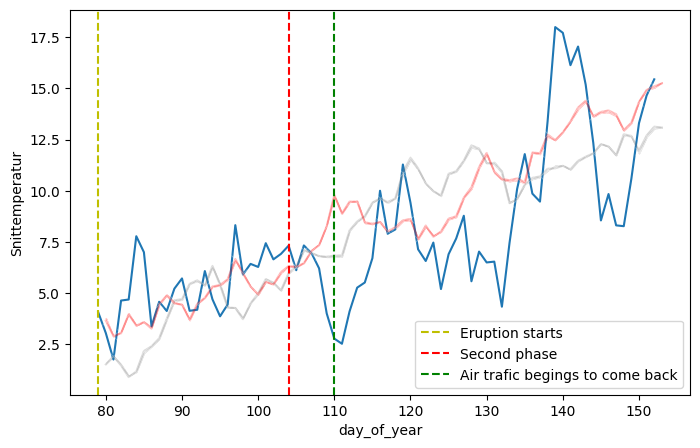

In [121]:
plt.figure(figsize=(8, 5))

graph = sns.lineplot(x=df_volcano['day_of_year'], y=df_volcano['Snittemperatur'])
sns.lineplot(x=bef_avg_10_years['day_of_year'], y=bef_avg_10_years['Snittemperatur'], alpha=0.3, c='grey', marker='x', ci=False)
sns.lineplot(x=after_avg_10_years['day_of_year'], y=after_avg_10_years['Snittemperatur'], alpha=0.3, c='r', marker='x', ci=False)

graph.axvline(x=start.day_of_year, label='Eruption starts', c='y', linestyle='--')
graph.axvline(x=second_phase.day_of_year, label='Second phase', c='r', linestyle='--')
graph.axvline(x=air_trafic_resumes.day_of_year, label='Air trafic begings to come back', c='g', linestyle='--')

graph.legend()
plt.show()

In [137]:
before = range(1999, 2010)
after = range(2011, 2022)

# def plot_before():
#     for i in before:
#         df_bef = df[df['Year'] == i].copy()
#         df_bef = df_bef[(df_bef['day_of_year'] >= 80) & (df_bef['day_of_year'] <= 153)]
#         return df_bef
        
# plots = plot_before()

# for i in plots:
#     print(i)
    # sns.lineplot(x=i['day_of_year'], y=i['Snittemperatur'])def plot_before():
def plot_before():    
    df_list = []
    for i in range(1999, 2010):
            df_bef = df[df['Year'] == i].copy()
            df_bef = df_bef[(df_bef['day_of_year'] >= 80) & (df_bef['day_of_year'] <= 153)]
            df_list.append(df_bef)
    return df_list
    
plots = [plot_before()]
print(len(plots))

1
